In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotting as plot
import itertools
# import pyreporter as pr

import recon
model = recon.recon.Recon()
util = recon.utilities.Utilities()

sns.set_style('white')
sns.set_style('ticks')

## Metabolomics data

In [2]:
mets1 = pd.read_csv('../../data/NAD_cell_lines/231102_TrpMet_data.csv', sep=';')
mets1['replicate'] = [int(i[-1]) for i in mets1.ID]
mets1['Compound.Name'].unique()

array(['3OHKYN', 'KYN', 'NAA', 'NICAC', 'NICAM', 'SAM'], dtype=object)

In [3]:
mets1.loc[mets1['Compound.Name'] == '3OHKYN', 'fullName'] = 'Hydroxykynurenine'
mets1.loc[mets1['Compound.Name'] == 'KYN', 'fullName'] = 'L-Kynurenine'
mets1.loc[mets1['Compound.Name'] == 'NAA', 'fullName'] = 'N-Acetyl-L-aspartic acid'
mets1.loc[mets1['Compound.Name'] == 'NICAC', 'fullName'] = 'Nicotinic acid'
mets1.loc[mets1['Compound.Name'] == 'SAM', 'fullName'] = 'S-Adenosylmethionine'

In [4]:
mets1

,ID,Compound.Name,Group,Area.Norm,Grubbs Test,replicate,fullName
0,CTRL_1,3OHKYN,CTRL,71017.026550,NaN,1,Hydroxykynurenine
1,CTRL_2,3OHKYN,CTRL,54418.489680,NaN,2,Hydroxykynurenine
2,CTRL_3,3OHKYN,CTRL,202595.379200,NaN,3,Hydroxykynurenine
3,CTRL_4,3OHKYN,CTRL,120454.888600,NaN,4,Hydroxykynurenine
4,CTRL_5,3OHKYN,CTRL,147918.632600,NaN,5,Hydroxykynurenine
...,...,...,...,...,...,...,...
85,OE_1,SAM,OE,9836.845405,NaN,1,S-Adenosylmethionine
86,OE_2,SAM,OE,17852.699850,NaN,2,S-Adenosylmethionine
87,OE_3,SAM,OE,11351.156000,NaN,3,S-Adenosylmethionine
88,OE_4,SAM,OE,11523.852090,NaN,4,S-Adenosylmethionine


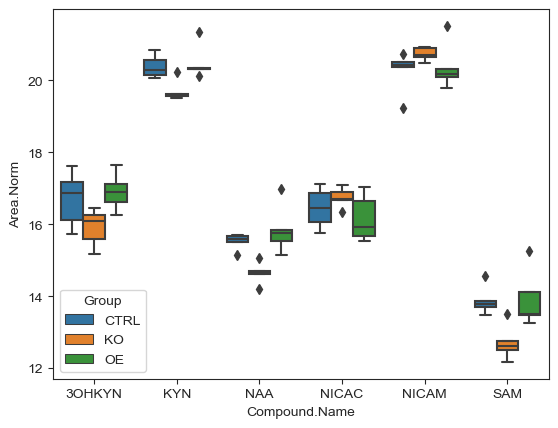

In [5]:
bp = sns.boxplot(data=mets1, hue='Group', y=np.log2(
    mets1['Area.Norm']), x='Compound.Name')

In [9]:
mets = pd.read_csv('../../data/NAD_cell_lines/merged_metabolites_measurement.csv')
m_wt = mets[mets.group == 'CTRL'].pivot_table(
    index='fullName', columns='replicate', values='Amount/mg Protein')
m_ko = mets[mets.group == 'KO'].pivot_table(
    index='fullName', columns='replicate', values='Amount/mg Protein')
m_oe = mets[mets.group == 'OE'].pivot_table(
    index='fullName', columns='replicate', values='Amount/mg Protein')

m_wt.columns = ['wt1', 'wt2', 'wt3', 'wt4', 'wt5']
m_ko.columns = ['ko1', 'ko2', 'ko3', 'ko4', 'ko5']
m_oe.columns = ['oe1', 'oe2', 'oe3', 'oe4', 'oe5']

In [10]:
mets1

,ID,Compound.Name,Group,Area.Norm,Grubbs Test,replicate,fullName
0,CTRL_1,3OHKYN,CTRL,71017.026550,NaN,1,Hydroxykynurenine
1,CTRL_2,3OHKYN,CTRL,54418.489680,NaN,2,Hydroxykynurenine
2,CTRL_3,3OHKYN,CTRL,202595.379200,NaN,3,Hydroxykynurenine
3,CTRL_4,3OHKYN,CTRL,120454.888600,NaN,4,Hydroxykynurenine
4,CTRL_5,3OHKYN,CTRL,147918.632600,NaN,5,Hydroxykynurenine
...,...,...,...,...,...,...,...
85,OE_1,SAM,OE,9836.845405,NaN,1,S-Adenosylmethionine
86,OE_2,SAM,OE,17852.699850,NaN,2,S-Adenosylmethionine
87,OE_3,SAM,OE,11351.156000,NaN,3,S-Adenosylmethionine
88,OE_4,SAM,OE,11523.852090,NaN,4,S-Adenosylmethionine


In [11]:
mets1 = mets1.rename(columns={'Area.Norm': 'Peak Area', 'Group': 'group'})
m_wt1 = mets1[mets1.group == 'CTRL'].pivot_table(
    index='fullName', columns='replicate', values='Peak Area')
m_ko1 = mets1[mets1.group == 'KO'].pivot_table(
    index='fullName', columns='replicate', values='Peak Area')
m_oe1 = mets1[mets1.group == 'OE'].pivot_table(
    index='fullName', columns='replicate', values='Peak Area')
m_wt1.columns = ['wt1', 'wt2', 'wt3', 'wt4', 'wt5']
m_ko1.columns = ['ko1', 'ko2', 'ko3', 'ko4', 'ko5']
m_oe1.columns = ['oe1', 'oe2', 'oe3', 'oe4', 'oe5']

In [12]:
m_wt1

,wt1,wt2,wt3,wt4,wt5
fullName,,,,,
Hydroxykynurenine,7.101703e+04,5.441849e+04,2.025954e+05,1.204549e+05,1.479186e+05
L-Kynurenine,1.154494e+06,1.097394e+06,1.890745e+06,1.281138e+06,1.545199e+06
N-Acetyl-L-aspartic acid,4.687971e+04,3.607635e+04,4.973235e+04,5.249477e+04,5.368118e+04
Nicotinic acid,NaN,5.554294e+04,1.126067e+05,7.247777e+04,1.414775e+05
S-Adenosylmethionine,1.317945e+04,1.131611e+04,2.422186e+04,1.419713e+04,1.492953e+04


In [13]:
def diff_met(ko, wt):
    df = pd.DataFrame()
    for i in itertools.product(ko.columns, wt.columns):
        df[i[0]+'_'+i[1]] = ko[i[0]].div(wt[i[1]], axis=0)
    return df

In [14]:
m_ko_wt = diff_met(m_ko, m_wt)
m_oe_wt = diff_met(m_oe, m_wt)

m_ko_wt1 = diff_met(m_ko1, m_wt1)
m_oe_wt1 = diff_met(m_oe1, m_wt1)

In [19]:
_m_ko_wt = pd.concat((m_ko_wt, m_ko_wt1), axis=0)

In [20]:
from matplotlib.lines import Line2D
def scatter_with_errorbar(xdata, ydata, xerr, yerr, ax, colors=None, x='WT_Car',
                          y='KO_Car', figtitle_suffix=' (RNAseq)',
                          legend_loc='upper right', compartment=False,
                          xlabel='Measured metabolomics foldchange (log2)',
                          ylabel='Predicted foldchange (log2)', cmap=None,
                          fig_title=False):
    """Creates scatter plot with error bars

    Args:
        xdata (pandas.series): data on x-axis
        ydata (pandas.series): data on y-axis
        xerr (list): _description_
        yerr (list): _description_
        ax (_type_): _description_
        colors (_type_, optional): _description_. Defaults to None.
        x (str, optional): _description_. Defaults to 'WT_Car'.
        y (str, optional): _description_. Defaults to 'KO_Car'.
        figtitle_suffix (str, optional): _description_. Defaults to ' (RNAseq)'.
        legend_loc (str, optional): _description_. Defaults to 'upper right'.
        compartment (bool, optional): _description_. Defaults to False.
    """
    if compartment == True:
        legend_elements = [Line2D([0], [0], marker='o', color='w', label='cytoplasm',
                                  markerfacecolor='r', markersize=15),
                           Line2D([0], [0], marker='o', color='w', label='mitochondrial',
                                  markerfacecolor='g', markersize=15),
                           Line2D([0], [0], marker='o', color='w', label='nuclear',
                                  markerfacecolor='b', markersize=15)]

        ax.scatter(xdata, ydata, zorder=3, c=colors, cmap=cmap)
        ax.errorbar(xdata, ydata, yerr=yerr, xerr=xerr,
                    fmt="o", ecolor=colors, cmap=cmap)
        ax.legend(handles=legend_elements, loc=legend_loc)
    else:
        sc = ax.errorbar(xdata, ydata, yerr=yerr, xerr=xerr,
                         fmt="o", cmap=cmap, ecolor=colors)
        # plt.colorbar(sc)
    ax.axhline(0.0, ls="--", c="k")
    ax.axvline(0.0, ls="--", c="k")
    if fig_title == True:
        ax.set_title(y+' vs '+x+figtitle_suffix)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

NameError: name 'new_mets' is not defined

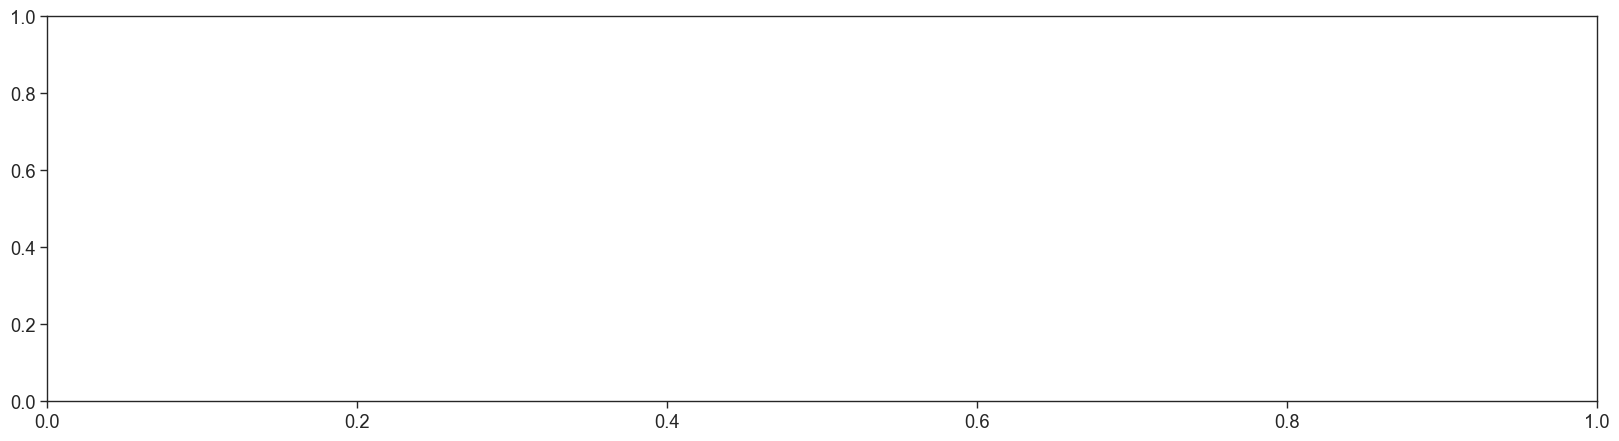

In [21]:
sns.set_context('paper', font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 5))
bp = sns.boxplot(data=new_mets, hue='group', y=np.log2(new_mets['Peak Area']), x='fullName', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90);
# ax.axhline(0, ls='--', color='k')

## HEK293 cells (SLC25A51 knockout vs WT)

### Predictions based on RNA-Seq

In [22]:
rna = pd.read_csv('../../data/NAD_cell_lines/gene_fpkm.xls.csv', index_col=0)
rna = rna[rna.columns[rna.columns.str.contains('wtHEK293|HEK25a51|HEK25A51')]]
rna = util.map_gene(df=rna, g_mapping=model.genes, mapping_column='ensembl_gene')
rna = rna[(rna != 0.0).all(axis=1)]
rna_wt = rna.filter(like='wtHEK')
rna_ko = rna.filter(like='HEK25a51ko')
rna_oe = rna.filter(like='HEK25A51oe')

def diff_exp(df, wt, ko):
    df = pd.DataFrame()
    for i in itertools.product(wt, ko):
        df[i[1]+'_'+i[0]] = rna[i[1]].div(rna[i[0]], axis=0)
    # df['base'] = 1.0
    return df

df_ko = diff_exp(rna, rna_wt, rna_ko)
df_oe = diff_exp(rna, rna_wt, rna_oe)


In [23]:
# res_HEK = pd.read_csv('../../data/NAD_cell_lines/pr_slc25a51ko_wt_pvalue.csv', sep='\t', index_col=0)
res_HEK = pd.read_csv('../../data/NAD_cell_lines/pr_slc25a51ko_wt.csv', sep='\t', index_col=0)
# res_HEK = pd.read_csv('../../data/NAD_cell_lines/pr_slc25a51ko_wt_kd001.csv', sep='\t', index_col=0)
# res_HEK = util.reshape(res_HEK)


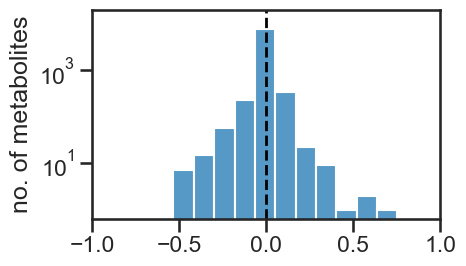

In [8]:
sns.set_context("talk")
plot.hist(pr=np.log2(res_HEK.mean(axis=1)), bins=11, figsize=(5, 3), xlim=(-1.0, 1.0), 
          ylim=(0, 2e4), 
          xlabel='', ylabel='no. of metabolites',
          save=True, filename='../../images/NAD_cell_lines/SLC25A51ko/histplot_HEK25a51ko_1.png')

In [50]:
# res_HEK = pd.read_csv('../../data/NAD_cell_lines/pr_slc25a51ko_wt_pvalue.csv', sep='\t', index_col=0)
res_HEK = pd.read_csv('../../data/NAD_cell_lines/pr_slc25a51ko_wt.csv', sep='\t', index_col=0)
res_HEK = util.reshape(res_HEK, include=None)
# _res = res_HEK[res_HEK.compartment != 'extracellular'].groupby('metabolites').mean()
_res = res_HEK[res_HEK.compartment.isin(['mitochondrial', 'nuclear', 'cytoplasm'])].groupby('metabolites').mean()
# _res = res_HEK.groupby('metabolites').mean()
_res_m = res_HEK[res_HEK.compartment == 'mitochondrial'].groupby('metabolites').mean()
_res_c = res_HEK[res_HEK.compartment == 'cytoplasm'].groupby('metabolites').mean()

In [51]:
df = pd.concat((_m_ko_wt.mean(axis=1), _res.mean(axis=1),
                _m_ko_wt.std(axis=1), _res.std(axis=1),
                util.calculate_cc(rna_ko[~(rna_ko == 0).all(axis=1)], grouping=None)), axis=1).dropna()
# df = pd.concat((m_ko_wt.mean(axis=1), _res_c.mean(axis=1), 
#                 m_ko_wt.std(axis=1), _res.std(axis=1),
#                 util.calculate_cc(rna_ko, grouping='cytoplasm')), axis=1).dropna()
# df = pd.concat((m_ko_wt.mean(axis=1), _res_m.mean(axis=1), 
#                 m_ko_wt.std(axis=1), _res.std(axis=1),
#                 util.calculate_cc(rna_ko, grouping='mitochondrial')), axis=1).dropna()
df.columns = ['measured', 'predicted', 'measured_std', 'predicted_std', 'control_coeff']
# df['hue'] = 'C0'
# df.loc[(df.p > 0.05), 'hue'] = 'grey'
# df.loc[(df.predicted < 1.01) & (df.predicted > 0.99), 'hue'] = 'grey'
# df.loc[(df.measured < 1.1) & (df.measured > 0.9), 'hue'] = 'grey'

import utility
coverage = {met: len(rna.index.intersection(utility.get_genes_from_metabolite(model, met)))/len(utility.get_genes_from_metabolite(model, met)) for met in df.index}
df['coverage'] = pd.Series(coverage)

# df = df[df.index.isin(cons_met.index)]
# df = df[~df.index.isin(['ADP', 'Adenosine monophosphate', 'Adenosine triphosphate', 'Cyclic AMP', 
#                         'L-Tryptophan', 'Fructose 6-phosphate', 'Glucose 6-phosphate', 'D-Glucose'
#                         ])]
df = df.rename(index={'Adenosine monophosphate': 'AMP', 'Adenosine triphosphate': 'ATP', 'Cyclic AMP': 'cAMP'})

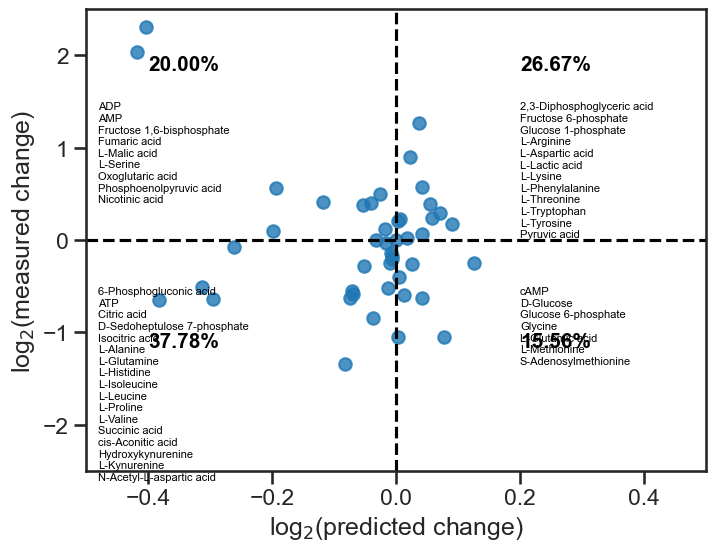

In [52]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x=np.log2(df['predicted']), y=np.log2(df['measured']), 
        #    c=df['hue'], 
           alpha=0.8)
ax.axhline(y=0.0, c='k', ls='--')
ax.axvline(x=0.0, c='k', ls='--')
plt.xlim(-0.5, 0.5)
plt.ylim(-2.5, 2.5)
ax.set_xlabel('log$_2$(predicted change)')
ax.set_ylabel('log$_2$(measured change)')

plot.add_percentage(df=df, ax=ax, colname2='predicted', colname='measured',
                    show_sc_percentages=False, fsize=15,
                    l=(0.1, 0.9), l2=(0.7, 0.9), l3=(0.1, 0.3), l4=(0.7, 0.3))
# fig.savefig('../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_mean.png', dpi=300, bbox_inches='tight')
# fig.savefig('../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_mean.svg', bbox_inches='tight')
plot.add_metabolite_names1(df=df, ax=ax, colname2='predicted', colname='measured', fsize=8)

In [ ]:
# # met = 'L-Tryptophan'
# for met in df.index:
#     ng = get_genes_from_metabolite(met)
#     common = rna.index.intersection(ng)
#     net_control = gs[gs.index == met].multiply((rna_ko.mean(axis=1) - rna_wt.mean(axis=1)).div(rna_wt.mean(axis=1), axis=0)).sum().sum()
#     # net_control = gs[gs.index == met].multiply(1 - df_ko.mean(axis=1)).replace(np.nan, 0.0).sum().sum()
#     # delta5percent = df_ko[df_ko.index.isin(common)][(df_ko.mean(axis=1) > 1.05) | (df_ko.mean(axis=1) < 0.95)]
#     # print(f'{len(ng)} genes for {met}')
#     # print(f'{len(common)} common genes for {met}')
#     # print(f'{len(delta5percent)} genes with 5% change for {met}')
#     print(f'control on {met}: {net_control}')

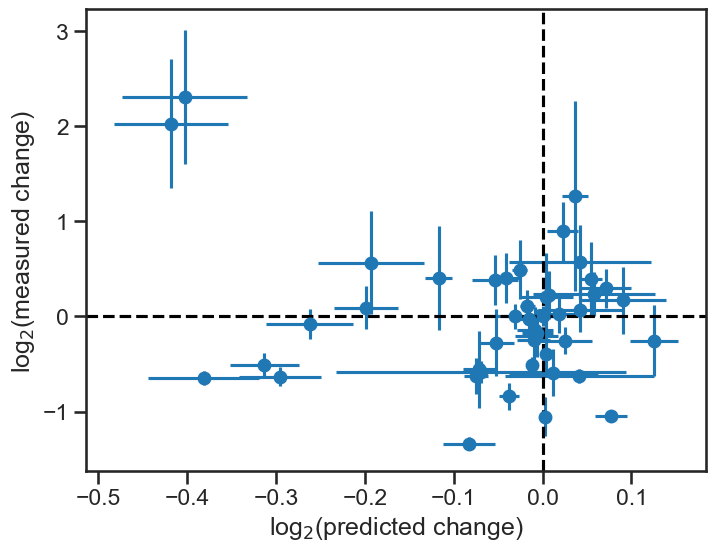

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter_with_errorbar(ydata=np.log2(df['measured']), xdata=np.log2(df['predicted']),
                      yerr=df['measured_std'], xerr=df['predicted_std'], ax=ax, 
                      ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)')

In [ ]:
mets = pd.DataFrame()
for met in df.index:
    nrxns = model.get_reactions_from_metabolite(met)
    # print(f'{len(nrxns)} reactions catalysed by {df.index[0]}')
    ngprs = {k:v for k,v in model.gpr.items() if k in nrxns.abbreviation.tolist()}
    # print(f'{len(ngprs)} reactions with GPRs')
    mapped_gprs = nm.eval_gpr(ngprs, model, pdict)
    mets =  mets.append(pd.Series([met, len(nrxns), len(ngprs), len(mapped_gprs[mapped_gprs != 1.0].index.intersection(ngprs.keys()))]), ignore_index=True)
    # print(f'{len(mapped_gprs[mapped_gprs != 1.0].index.intersection(ngprs.keys()))} out of {len(ngprs)} reactions with mapped GPRs')
mets.columns = ['metabolite', 'total number of rxns', 'number of rxns with gpr', 'number of rxns with mapped gpr']

_df = df.drop('control_coeff', axis=1).rename(columns={'measured':'measured change', 'predicted':'predicted change'})
_df.loc[(_df['predicted change'] > 1.0) & (_df['measured change'] > 1.0), 'quadrant'] = 'UR'
_df.loc[(_df['predicted change'] < 1.0) & (_df['measured change'] > 1.0), 'quadrant'] = 'UL'
_df.loc[(_df['predicted change'] < 1.0) & (_df['measured change'] < 1.0), 'quadrant'] = 'LL'
_df.loc[(_df['predicted change'] > 1.0) & (_df['measured change'] < 1.0), 'quadrant'] = 'LR'
_df = _df.merge(mets, left_on=_df.index, right_on='metabolite').set_index('metabolite')
_df.reset_index().to_excel('../../manuscript/results_slc25a51ko_rnaseq.xlsx', index=False)

In [92]:
st1 = pd.read_excel('../../manuscript/results_slc25a51ko_rnaseq.xlsx')
st1.quadrant = st1.quadrant.map({'upper right': 'UR', 'upper left': 'UL', 'lower left': 'LL', 'lower right': 'LR'})

In [94]:
st1.to_excel('../../manuscript/results_slc25a51ko_rnaseq.xlsx', index=False)

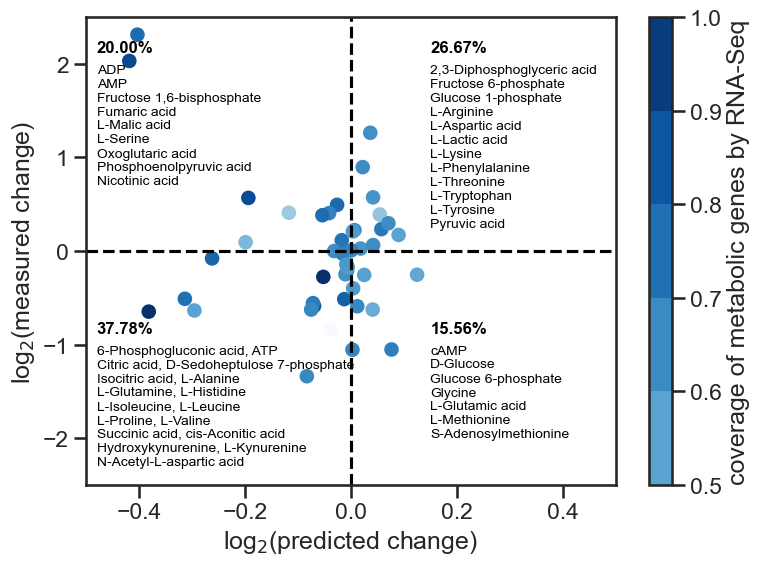

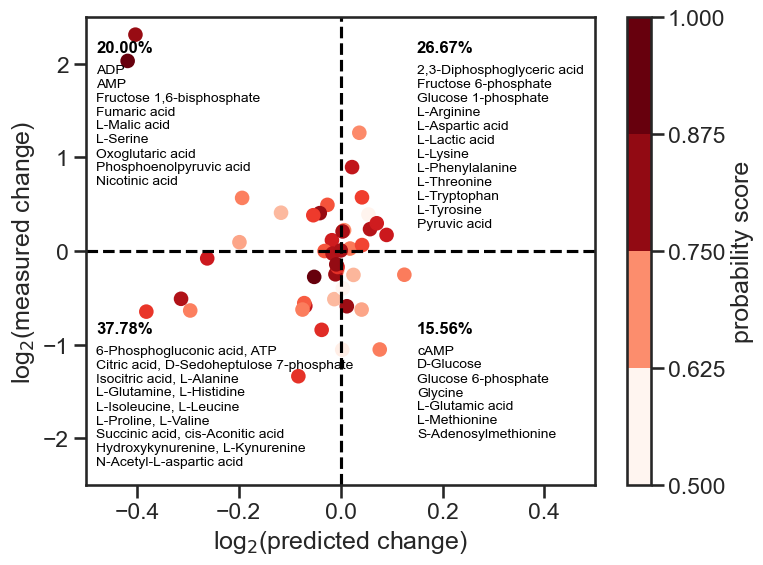

In [53]:
sns.set_context('talk')
sns.set_style('ticks')
_df = df.copy()
_df = _df.rename(index={'Adenosine monophosphate': 'AMP', 'Adenosine triphosphate': 'ATP', 'Cyclic AMP': 'cAMP'})
# _df = _df[(_df['measured'].le(0.9)) | (_df['measured'].ge(1.1))]
# _df = _df[(_df['predicted'].le(0.99)) | (_df['predicted'].ge(1.01))]
plot.parity(data=_df, xcolumn='measured', ycolumn='predicted', 
            show_percentage=True, show_names=True, cc=True, cc_column='coverage',
            ub=1.0, lb=0.5, nb=6, cbar_cmap='Blues', alpha=1.0, cbar_label='coverage of metabolic genes by RNA-Seq',
            figsize=(8, 6), save=False, edgecolor=None, #figtitle='cytosolic',
            filename='../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_coverageRNASeq_mean_mcn.png',
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[1, 1, 2, 1], fsize=10, xlim=(-0.5, 0.5), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.65, 0.95), (0.02, 0.35), (0.65, 0.35)],
            l_n=[(0.02, 0.90), (0.65, 0.90), (0.02, 0.30), (0.65, 0.30)])

plot.parity(data=_df, xcolumn='measured', ycolumn='predicted', 
            show_percentage=True, show_names=True, cc=True, cc_column='control_coeff',
            ub=1.0, lb=0.5, nb=5, cbar_cmap='Reds', alpha=1.0, cbar_label='probability score',
            figsize=(8, 6), save=False, edgecolor=None, #figtitle='cytosolic',
            filename='../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_probability_mean_mcn.png',
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[1, 1, 2, 1], fsize=10, xlim=(-0.5, 0.5), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.65, 0.95), (0.02, 0.35), (0.65, 0.35)],
            l_n=[(0.02, 0.90), (0.65, 0.90), (0.02, 0.30), (0.65, 0.30)])

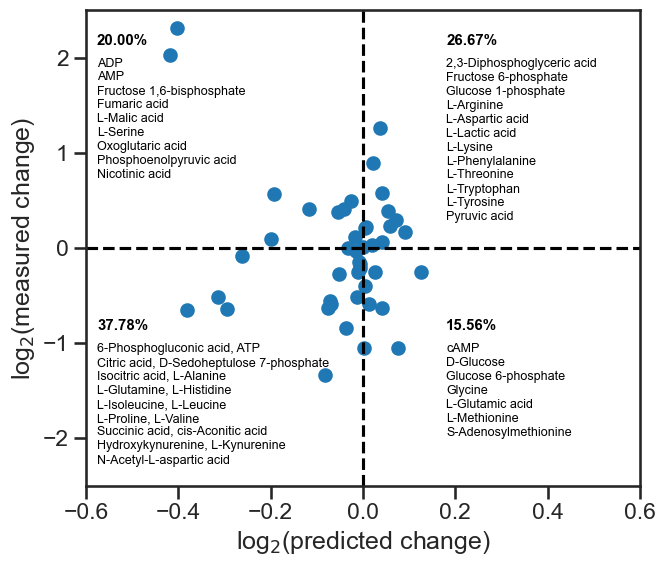

In [54]:
sns.set_context('talk')
sns.set_style('ticks')
_df = df.copy()
# _df = _df[(_df['measured'].le(0.9)) | (_df['measured'].ge(1.1))]
# _df = _df[(_df['predicted'].le(0.99)) | (_df['predicted'].ge(1.01))]
plot.parity(data=_df, xcolumn='measured', ycolumn='predicted', 
            show_percentage=True, show_names=True, cc=False, cc_column='coverage',
            ub=1.0, lb=0.5, nb=6, cbar_cmap='Blues', alpha=1.0, cbar_label='coverage of metabolic genes by RNA-Seq',
            figsize=(7, 6), save=True, edgecolor=None, #figtitle='cytosolic',
            filename='../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_mean.svg',
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[1, 1, 2, 1], fsize=9, xlim=(-0.6, 0.6), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.65, 0.95), (0.02, 0.35), (0.65, 0.35)],
            l_n=[(0.02, 0.90), (0.65, 0.90), (0.02, 0.30), (0.65, 0.30)])

In [55]:
len(util.get_consistent_mets(_df[['measured', 'predicted']]).index)
# len(_df)

29

In [48]:
len(util.get_consistent_mets(_df[['measured', 'predicted']]).index)
len(_df)

45

In [56]:
29/45

0.6444444444444445

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
_df = df.copy()
_df = _df[(_df['measured'].le(0.9)) | (_df['measured'].ge(1.1))]
_df = _df[(_df['predicted'].le(0.99)) | (_df['predicted'].ge(1.01))]
plot.parity(data=_df, xcolumn='measured', ycolumn='predicted', 
            show_percentage=True, show_names=True, cc=True, cc_column='coverage',
            ub=1.0, lb=0.5, nb=6, cbar_cmap='Blues', alpha=1.0, cbar_label='coverage of metabolic genes by RNA-Seq',
            figsize=(8, 6), save=True, figtitle='cytosolic',
            filename='../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_coverageRNASeq_cyto.png',
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[2, 1, 2, 1], fsize=10, xlim=(-0.5, 0.5), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.65, 0.95), (0.02, 0.35), (0.65, 0.35)],
            l_n=[(0.02, 0.90), (0.65, 0.90), (0.02, 0.30), (0.65, 0.30)])

plot.parity(data=_df, xcolumn='measured', ycolumn='predicted', 
            show_percentage=True, show_names=True, cc=True, cc_column='control_coeff',
            ub=1.0, lb=0.45, nb=6, cbar_cmap='Reds', alpha=1.0, #cbar_label='coverage of metabolic genes by RNA-Seq',
            figsize=(8, 6), save=True, figtitle='citosolic',
            filename='../../images/NAD_cell_lines/SLC25A51ko/parity_slc25a51ko_probability_cyto.png',
            ylabel='log$_2$(measured change)', xlabel='log$_2$(predicted change)',
            n=[2, 1, 2, 1], fsize=10, xlim=(-0.5, 0.5), ylim=(-2.5, 2.5),
            l_p=[(0.02, 0.95), (0.65, 0.95), (0.02, 0.35), (0.65, 0.35)],
            l_n=[(0.02, 0.90), (0.65, 0.90), (0.02, 0.30), (0.65, 0.30)])


In [ ]:
consistent = util.get_consistent_mets(df.drop(['control_coeff', 'measured_std', 'predicted_std'], axis=1))
print(f'Consitent metabolites ({len(consistent.index)}): {consistent.index}')
unconsistent = df.index.difference(consistent.index)
print(f'Unconsitent metabolites ({len(unconsistent)}): {unconsistent}')

In [ ]:
met = 'L-Malic acid'
_df = model.get_reactions_from_metabolite(met)
# _df1 = _df[~(_df.gpr.isna())]
print(f'Total number of reactions: {len(_df.abbreviation.unique())}')
ng = get_genes_from_metabolite(met)
print(f'Number of genes: {len(ng)}')
print(f'covered by rnaseq: {len(rna.index.intersection(ng))}')
# print(f'Missing number of reactions: {len(_df1[_df1.weight == 1.0])}')

In [ ]:
_mets = pd.DataFrame()
for met in df.index:
    _dfr = get_rxns_from_metabolite(model, metabolite=met, rna_seq=True)
    _df1r = _dfr[~(_dfr.gpr.isna())]
    _dfp = get_rxns_from_metabolite(model, metabolite=met, rna_seq=False)
    _df1p = _dfp[~(_dfp.gpr.isna())]
    _mets = _mets.append(pd.Series([met, len(_dfr), len(_df1r), len(_df1r[_df1r.weight == 1.0]), len(_df1p[_df1p.weight == 1.0])]), ignore_index=True)
_mets.columns = ['metabolite', 'total_rxns', 'rxns_with_gpr', 'rxns_with_missing_gpr_rnaseq', 'rxns_with_missing_gpr_proteomics']

In [ ]:
_mets.to_excel('../manuscript/results_coverage_slc25a51ko.xlsx', index=False)

In [ ]:
gs = util.reshape(model.gs, include=None)

In [ ]:
gs_mets = gs.query('metabolites in @_mets.metabolite and compartment != "extracellular"').groupby('metabolites').mean()

In [ ]:
control = pd.DataFrame()
tol = 1e-2
for met in _mets.metabolite:
    _gs = gs_mets.query(f'metabolites == "{met}"').max()
    le_gs = _gs[_gs.le(-tol)].sort_values().index[-5:].to_list()
    ge_gs = _gs[_gs.ge(tol)].sort_values().index[-5:].to_list()
    # _gs = _gs[_gs.le(-1e-2) | _gs.ge(1e-2)]
    nsub = len(model.get_subsystem_from_gene(le_gs+ge_gs).subsystem.unique())
    control = control.append(pd.Series([met, 10, nsub]), ignore_index=True)
    # print(f'{met}: {_gs.shape[0]} genes involved in {nsub} susbsystems')
control.columns = ['metabolite', 'no. of genes', 'subsystems']

In [ ]:
control#.to_excel('../manuscript/results_control_slc25a51ko.xlsx', index=False)

In [ ]:
sns.set_context('paper')
sns.clustermap(data=util.drop_constant_columns(gs_mets), cmap='coolwarm', center=0.0, 
            xticklabels=False, yticklabels=True)

In [ ]:
sns.kdeplot(data=gs_mets)

In [ ]:
res_p = pd.read_csv('../data/NAD_cell_lines/pr_centrality_new_method_prot_HEK25a51ko.csv', sep='\t', index_col=0)
res_HEK = pd.read_csv('../data/NAD_cell_lines/pr_centrality_new_method_HEK25a51ko.csv', sep='\t', index_col=0)
_df = pd.concat((res_HEK.mean(axis=1), res_p.mean(axis=1)), axis=1)
_df = _df.rename(columns={1: 'Proteomics', 0: 'RNA-Seq'})
# _df1 = util.reshape(_df, include=None)
# _df2 = pd.concat((_df1.groupby('metabolites').mean(),
#            m_ko_wt.mean(axis=1).rename('metabolomics')), axis=1).dropna()

In [ ]:
sns.kdeplot(data=_df, shade=True)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(y='metabolomics', x='rnaseq', data=np.log2(_df2), alpha=0.8, label='RNA-seq', ax=ax)
sns.scatterplot(y='metabolomics', x='proteomics', data=np.log2(_df2), alpha=0.8, label='Proteomics', ax=ax)
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')
plt.ylabel('log$_2$(measured change)')
plt.xlabel('log$_2$(predicted change)')
plt.xlim((-1.5, 1.5))
plt.ylim((-3, 3))
fig.savefig('../images/NAD_cell_lines/SLC25A51ko/parity_rp_new_method_slc25a51ko.png', dpi=300, bbox_inches='tight')

In [ ]:
_rna = util.divide_all_columns_by_each_column(rna)
_prot = util.divide_all_columns_by_each_column(prot)

In [ ]:
cols = [i for i in _prot.columns if (i.split('_')[-2] == 'wt') and (i.split('_')[0] == 'ko')]
_prot_ko = _prot[cols]

In [ ]:
cols = [i for i in _rna.columns if (i.split('_')[-2] == 'wtHEK293') and (i.split('_')[0] == 'HEK25a51ko')]
_rna_ko = _rna[cols]



In [ ]:
common_genes = rna.index.intersection(prot.index)
_rp = pd.concat([_rna_ko.query('index in @common_genes').mean(axis=1),
                 _prot_ko.query('index in @common_genes').mean(axis=1)], axis=1).replace(np.inf, np.nan).dropna()
_rp.columns = ['RNA-Seq', 'Proteomics']
                

In [ ]:
import scipy.stats as stats
sns.set_context('talk', font_scale=1.2)
r, p = stats.pearsonr(x=_rp['RNA-Seq'], y=_rp['Proteomics'])
g = sns.jointplot(x='RNA-Seq', y='Proteomics', data=np.log2(_rp), kind='reg', 
                  height=8, color='royalblue', marginal_ticks=True)
g.set_axis_labels(xlabel='log$_2$(change in RNA-Seq)', ylabel='log$_2$(change in Proteomics)')
g.ax_joint.annotate(f'$r = {r:.2f}$',
                    xy=(0.75, 0.6), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 
                          'fc': 'powderblue', 
                          #'ec': 'navy'
                          })
g.savefig('../images/NAD_cell_lines/SLC25A51ko/jointplot_rnaseq_vs_proteomics.png', dpi=300, bbox_inches='tight')

In [ ]:
_df = pd.concat((_rna_ko.query('index in @common_genes').mean(axis=1), 
                 _prot_ko.query('index in @common_genes').mean(axis=1)), axis=1).replace(np.inf, np.nan).dropna()
util.get_consistent_mets(_df).plot.scatter(0, 1, figsize=(4, 4))

In [ ]:
import new_method as nm
W = pd.read_csv('../data/NAD_cell_lines/weights_rnaseq.csv', sep='\t', index_col=0)
cols = [i for i in W.columns if (i.split('_')[-2] == 'wtHEK293') and (i.split('_')[0] == 'HEK25a51ko')]
W_ko_wt = W[cols]
W_ko_wt[W_ko_wt.index == 'NADtm'] = 0.0

In [ ]:
_df = nm.get_rxns_with_weights('L-Serine', model=model, W=W_ko_wt)